# Expanding confusion

- supervised by Prof. Cheng Zhao

## References:

1. Davis & Lineweaver: *Expanding Confusion: common misconceptions of cosmological horizons and the superluminal expansion of the Universe*, 2003, https://arxiv.org/abs/astro-ph/0310808v2

## from time to scale factor

use $a E(a)$

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from scipy import integrate

the equation $dt/da$, a0 is set to 1.

In [4]:
def dt_over_da(a, H0, a0, OmR, OmM, OmL, OmK):
    sq = H0 * a0 * np.sqrt(OmR /a**(2) + OmM / a + OmL *a**2 + OmK)
    return 1/sq

In [5]:
a1_l = np.arange(0.01, 1, 0.01)
t_l = []

units:

In [6]:
Mpc_over_km = 3.08567758 * 10**19
Myr_over_s = 365.25*24*3600 * 10**6

H0 in unit /Myr

In [7]:
H0, a0, OmR, OmM, OmL, OmK = 70/Mpc_over_km*Myr_over_s, 1, 0, 0.3, 0.7, 0

In [8]:
for a1 in a1_l:
    t = integrate.quad(lambda a: dt_over_da(a, H0, a0, OmR, OmM, OmL, OmK), 0, a1)
    t_l.append(t[0])
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


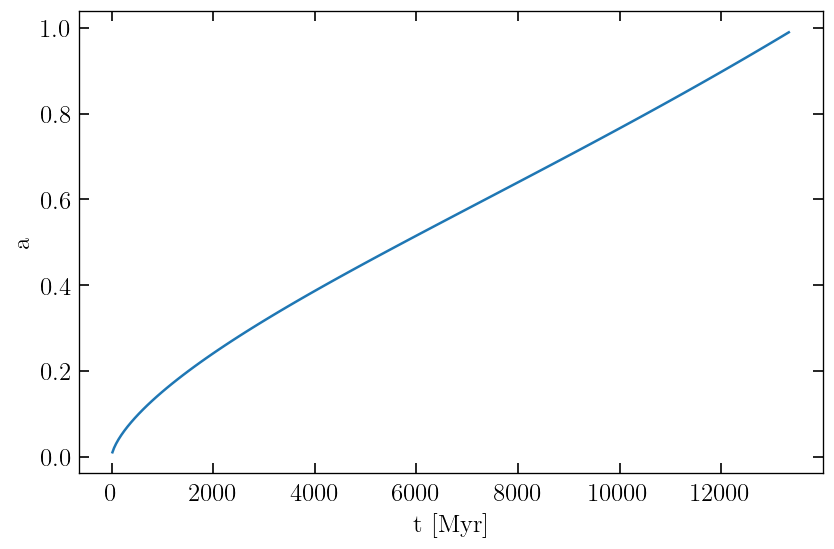

In [9]:
plt.plot(t_l, a1_l)
plt.xlabel("t [Myr]")
plt.ylabel("a")
plt.legend()

### z(t)

In [10]:
def a2z(a, a0=1):
    return a0 / a - 1 

In [11]:
z1_l = a2z(a1_l)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


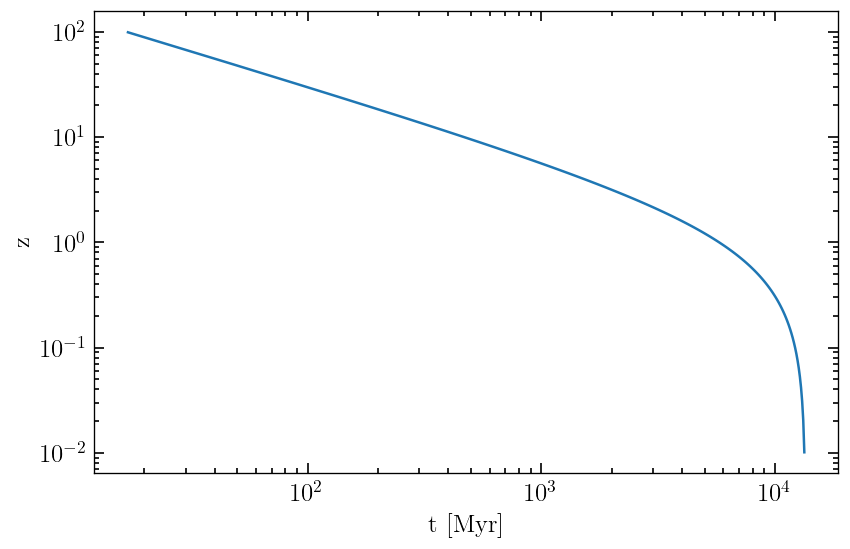

In [12]:
plt.plot(t_l, z1_l)
plt.xlabel("t [Myr]")
plt.ylabel("z")
plt.yscale('log')
plt.xscale("log")
plt.legend()

## Hubble sphere

$$E(a) = \sqrt{ \Omega_R \left(\frac{a}{a_0}\right)^{-4} + \Omega_M \left(\frac{a}{a_0}\right)^{-3} + \Omega_\Lambda + \Omega_K \left(\frac{a}{a_0}\right)^{-2} }$$

In [13]:
def Ha(a, H0, a0, OmR, OmM, OmL, OmK):
    'give me H0 in /Myr (/s), return Ha in /Myr (/s)'
    Ea = np.sqrt(OmR /a**4 + OmM / a**3 + OmL + OmK / a**2)
    return H0 * Ea

In [14]:
H0 = 70 #km/s/Mpc

In [15]:
c = 3e5 #km/s

In [16]:
chi_H = c/(a1_l * Ha(a1_l, H0, a0, OmR, OmM, OmL, OmK)) #Mpc

## Light Cone

In [17]:
lc_l = []

In [18]:
def lc_over_da(a, H0, a0, OmR, OmM, OmL, OmK):
    'give me H0 in km/s/Mpc, return chi_lc in Mpc, as c is in km/s'
    sq = a*a * Ha(a, H0, a0, OmR, OmM, OmL, OmK)
    return c/sq

In [19]:
for a1 in a1_l:
    lc = integrate.quad(lambda a: lc_over_da(a, H0, a0, OmR, OmM, OmL, OmK), a1, a0)
    lc_l.append(lc[0])

## Particle Horizon

In [20]:
ph_l = []
for a1 in a1_l:
    ph = integrate.quad(lambda a: lc_over_da(a, H0, a0, OmR, OmM, OmL, OmK), 0, a1)
    ph_l.append(ph[0])

### optical horizon

In [25]:
z_r = 1100
a_r = a0/(1+z_r)

In [26]:
oh_l = []
for a1 in a1_l:
    oh = integrate.quad(lambda a: lc_over_da(a, H0, a0, OmR, OmM, OmL, OmK), a_r, a1)
    oh_l.append(oh[0])

In [30]:
ph_l = np.array(ph_l)
oh_l = np.array(oh_l)
fe = ph_l/oh_l -1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


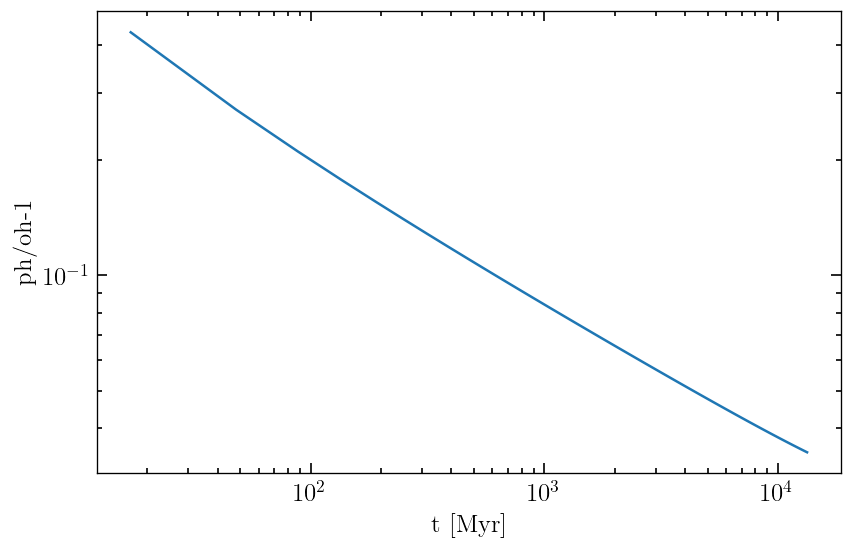

In [33]:
plt.plot(t_l, fe)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("t [Myr]")
plt.ylabel("ph/oh-1")
plt.legend()

## plot

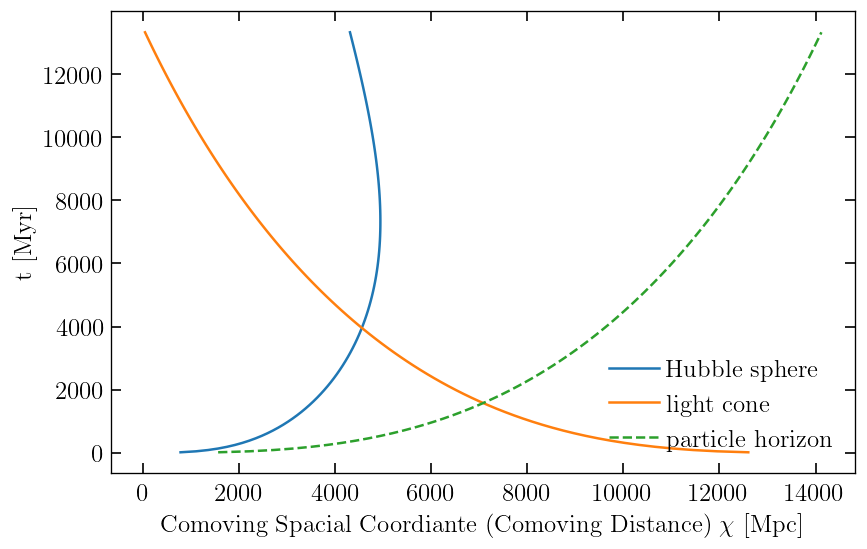

In [24]:
plt.plot(chi_H, t_l, label="Hubble sphere")
plt.plot(lc_l, t_l, label="light cone")
plt.plot(ph_l, t_l, label="particle horizon", linestyle="dashed")
plt.xlabel("Comoving Spacial Coordiante (Comoving Distance) $\chi$ [Mpc]")
plt.ylabel("t [Myr]")
# plt.yscale('log')
# plt.xscale("log")
plt.legend()